[View in Colaboratory](https://colab.research.google.com/github/rdenadai/DSP-Study-Notebooks/blob/master/notebooks/dsp101f.ipynb)

## DSP 101f


Experiments on Digital Signal Processing, ranging from random generated signals, voice and images!

In these experiments, we are not analysing signals in the range of DSP but also with an statistical view...

To build this document we use a lot of resources, here are some of the most important.
- References:
 - [DSP Guide](http://www.dspguide.com)
 - [Understand the Fourier transform and its applications](https://www.udemy.com/fourier-transform-mxc/)
 - [MikeXCohen Lectures](http://www.mikexcohen.com/left_toc.html)
 - [Elegant SciPy](https://github.com/elegant-scipy/elegant-scipy)
 - [DSP Tutorial](https://www.tutorialspoint.com/digital_signal_processing/index.htm)
 - [Plotly FFT Filters](https://plot.ly/python/fft-filters/)
 - [Digital Signal Processing {youtube}](https://www.youtube.com/playlist?list=PLuh62Q4Sv7BUSzx5Jr8Wrxxn-U10qG1et)
 - [Signal Processing 101 {youtube}](https://www.youtube.com/watch?v=KZd68xgasIU&list=PLJ-OcUCIty7evBmHvYRv66RcuziszpSFB)
 - [All Signal Processing {youtube}](https://www.youtube.com/user/allsignalprocessing/playlists)


In [0]:
import math
import random
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.signal import resample, hilbert
from scipy import interpolate
from scipy import fftpack
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import ImageGrid
from IPython.display import Audio

%matplotlib inline

def normalization(x, m=255):
    return (((x - min(x)) / (max(x) - min(x))) * m).astype('int64')

def normalization2(x, a, b):
    return (a + (((x - min(x)) * (b - a)) / (max(x) - min(x)))).astype('float64')

def sine(A=4096, f=1, t=1, Fs=1024, phi=0, dtype=np.int64):
    n = np.arange(Fs * t)
    return (A * np.sin((((2 * np.pi * f) * n) / Fs) + phi)).astype(dtype)

def cosine(A=4096, f=1, t=1, Fs=1024, phi=0, dtype=np.int64):
    n = np.arange(Fs * t)
    return (A * np.cos((((2 * np.pi * f) * n) / Fs) + phi)).astype(dtype)

def complex_wave(A=1, f=1, t=1, Fs=1024, phi=0):
    n = np.arange(Fs * t)
    return (A * np.exp((((2 * np.pi * f) * n) / Fs) * 1j + phi))

### Delta Function Pairs

*"For discrete signals, the delta function is a simple waveform, and has an equally simple Fourier transform pair."* [dspguide.com](http://www.dspguide.com/ch11/1.htm)

Bellow example shows that a impulse in time domain, represents a linear phase shift in frequency domain and a constant magnitude.

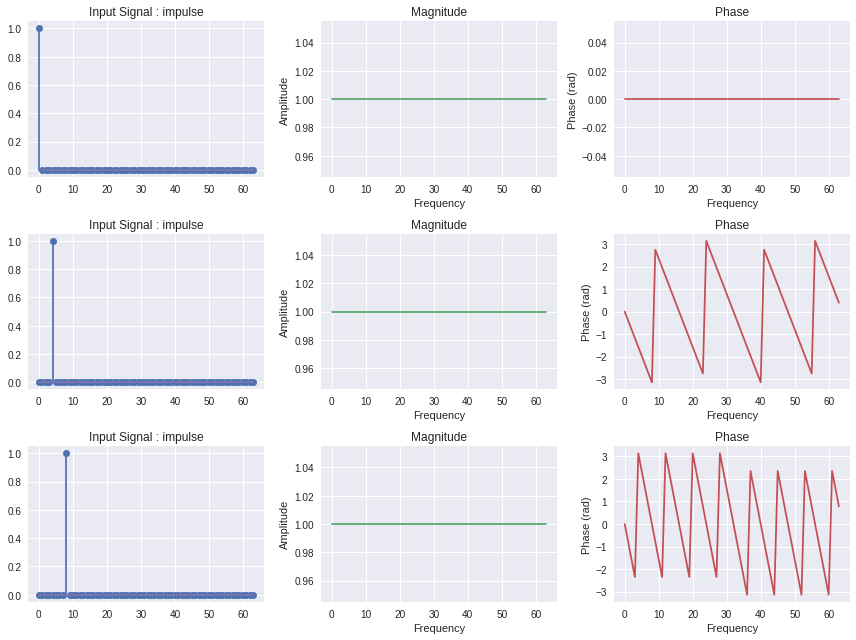

In [21]:
x = np.zeros(64)
x[0] = 1
X = fftpack.fft(x)

x2 = np.zeros(64)
x2[4] = 1
X2 = fftpack.fft(x2)

x3 = np.zeros(64)
x3[8] = 1
X3 = fftpack.fft(x3)

plt.figure(figsize=(12, 9))
plt.subplot(331)
plt.title('Input Signal : impulse')
plt.stem(x)
plt.subplot(332)
plt.title('Magnitude')
plt.plot(np.abs(X), color='C1')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.subplot(333)
plt.title('Phase')
plt.plot(np.angle(X), color='C2')
plt.xlabel('Frequency')
plt.ylabel('Phase (rad)')
plt.subplot(334)
plt.title('Input Signal : impulse')
plt.stem(x2)
plt.subplot(335)
plt.title('Magnitude')
plt.plot(np.abs(X2), color='C1')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.subplot(336)
plt.title('Phase')
plt.plot(np.angle(X2), color='C2')
plt.xlabel('Frequency')
plt.ylabel('Phase (rad)')
plt.subplot(337)
plt.title('Input Signal : impulse')
plt.stem(x3)
plt.subplot(338)
plt.title('Magnitude')
plt.plot(np.abs(X3), color='C1')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.subplot(339)
plt.title('Phase')
plt.plot(np.angle(X3), color='C2')
plt.xlabel('Frequency')
plt.ylabel('Phase (rad)')

plt.tight_layout()
plt.show()

Differently from the example above, the next graphics shows the real and imaginary parts of the Delta function impulse.

*"Each sample in the time domain results in a cosine wave being added to the real part of the frequency domain, and a negative sine wave being added to the imaginary part. The amplitude of each sinusoid is given by the amplitude of the time domain sample. The frequency of each sinusoid is provided by the sample number of the time domain point."* [dspguide.com](http://www.dspguide.com/ch11/1.htm)

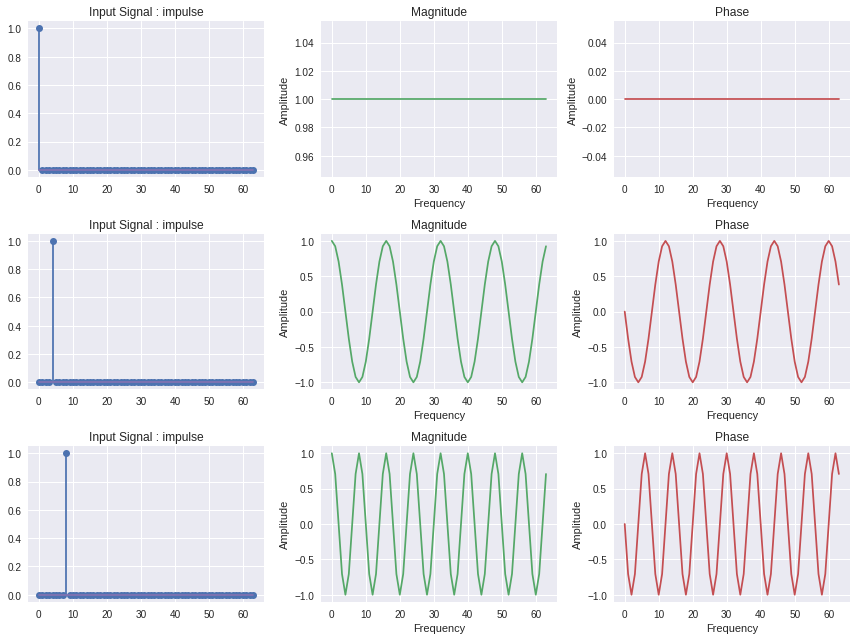

In [23]:
x = np.zeros(64)
x[0] = 1
X = fftpack.fft(x)

x2 = np.zeros(64)
x2[4] = 1
X2 = fftpack.fft(x2)

x3 = np.zeros(64)
x3[8] = 1
X3 = fftpack.fft(x3)

plt.figure(figsize=(12, 9))
plt.subplot(331)
plt.title('Input Signal : impulse')
plt.stem(x)
plt.subplot(332)
plt.title('Magnitude')
plt.plot(np.real(X), color='C1')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.subplot(333)
plt.title('Phase')
plt.plot(np.imag(X), color='C2')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.subplot(334)
plt.title('Input Signal : impulse')
plt.stem(x2)
plt.subplot(335)
plt.title('Magnitude')
plt.plot(np.real(X2), color='C1')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.subplot(336)
plt.title('Phase')
plt.plot(np.imag(X2), color='C2')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.subplot(337)
plt.title('Input Signal : impulse')
plt.stem(x3)
plt.subplot(338)
plt.title('Magnitude')
plt.plot(np.real(X3), color='C1')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.subplot(339)
plt.title('Phase')
plt.plot(np.imag(X3), color='C2')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()